9


/var/folders/8f/jj65qb91607247cr1jycxhq00000gn/T/ipykernel_69008/3951172254.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_extracted = pd.concat([data_extracted, extract_time_and_voltage(file_path, header_extracted)], ignore_index=True)


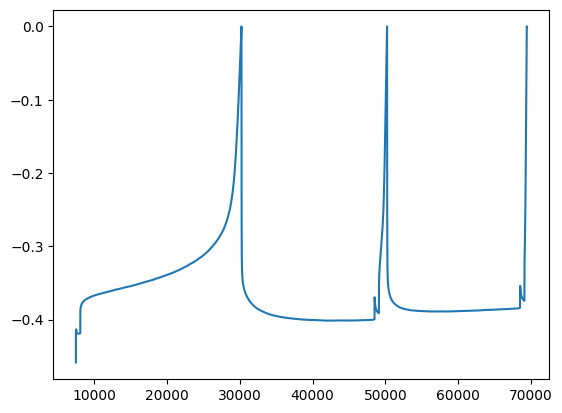

            time/s         Ewe/V
0      7506.060055 -4.585569e-01
1      7506.165055 -4.485430e-01
2      7506.463855 -4.384434e-01
3      7507.269455 -4.284306e-01
4      7509.603055 -4.184236e-01
...            ...           ...
3712  69401.930896 -2.462593e-02
3713  69410.632094 -1.462273e-02
3714  69419.348092 -4.619531e-03
3715  69423.329491  2.661782e-07
3716  69423.329691 -6.082196e-05

[3717 rows x 2 columns]


In [3]:
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt

def read_mpt_files(path):
    # フォルダ内の全てのmptファイルを取得
    mpt_files = glob.glob(path + "/*.mpt")
    # ただし、ファイル名にCVが含まれるものは除外
    mpt_files = [file for file in mpt_files if not "_CV" in file]
    # ファイル名を昇順にソート
    mpt_files.sort()
    print(len(mpt_files))
    return mpt_files

def determine_header_lines(file_path, keyword='Nb header lines'):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            if keyword in line:
                header_lines = int(line.split(':')[1].strip())
                return header_lines
    return 0  # Default if keyword is not found

def extract_time_and_voltage(file_path, header_line):
    df = pd.read_csv(file_path, skiprows=header_line-1, delimiter='\t')
    column_names = df.columns
    # 必要な列が存在するかどうかをチェックし、存在する場合のみ抽出
    required_columns = ["time/s", "Ewe/V"]
    existing_columns = [col for col in required_columns if col in column_names]
    if len(existing_columns) == len(required_columns):
        return df[existing_columns]
    else:
        # 必要な列が存在しない場合は、エラーメッセージを表示または空のDataFrameを返す
        print(f"Error: Required columns {required_columns} not found in {file_path}")
        return pd.DataFrame()

def CP_grapher(folder_path):
    all_mpts = read_mpt_files(folder_path)

    data_extracted = pd.DataFrame()

    for file_path in all_mpts:
        header_extracted = determine_header_lines(file_path)
        data_extracted = pd.concat([data_extracted, extract_time_and_voltage(file_path, header_extracted)], ignore_index=True)
        extract_time_and_voltage(file_path, header_extracted).to_csv(file_path.replace(".mpt",".csv"), index=False, encoding='utf-8')

    plt.plot(data_extracted["time/s"], data_extracted["Ewe/V"])
    plt.show()

if __name__ == "__main__":
    CP_grapher("/Users/genkioyafuso/Documents/Sacci_lab/STC_grapher/data_dir/")


In [ ]:
import pandas as pd
import glob
from matplotlib import pyplot as plt
import streamlit as st

def read_mpt_files(path):
    # フォルダ内の全てのmptファイルを取得
    mpt_files = glob.glob(path + "/*.mpt")
    # ただし、ファイル名に完全一致で"CV"が含まれるものは除外
    mpt_files_except_CV = [file for file in mpt_files if not "CV" in file]
    # mpt_files_except_CVに"OCV"が含まれるものを追加
    for file in mpt_files:
        if "OCV" in file:
            mpt_files_except_CV.append(file)
    return mpt_files_except_CV

def determine_header_lines(file_path, keyword='Nb header lines'):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for i, line in enumerate(lines):
            if keyword in line:
                header_lines = int(line.split(':')[1].strip())
                return header_lines
    return 0  # Default if keyword is not found

def extract_time_and_voltage(file_path, header_line):
    df = pd.read_csv(file_path, skiprows=header_line-1, delimiter='\t')
    return df[["time/s", "Ewe/V"]]

def CP_grapher(folder_path):
    all_mpts = read_mpt_files(folder_path)

    data_extracted = pd.DataFrame()
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    for file_path in all_mpts:
        header_extracted = determine_header_lines(file_path)
        #data_extracted = pd.concat([data_extracted, extract_time_and_voltage(file_path, header_extracted)], ignore_index=True)
        data_extracted = pd.concat([data_extracted, extract_time_and_voltage(file_path, header_extracted)], ignore_index=True)
        #ax.plot(data_extracted["time/s"], data_extracted["Ewe/V"])
    # data_extractedのtime/sを昇順になるようにソート
    data_extracted = data_extracted.sort_values('time/s')
    return data_extracted
    #ax.plot(data_extracted["time/s"], data_extracted["Ewe/V"])
    #plt.show()


if __name__ == "__main__":
    CP_grapher("/Users/genkioyafuso/Documents/Sacci_lab/STC_grapher/data_dir")
